# 기상자료 활용하기

In [1]:
import pandas as pd

## 기상자료 다운받기

In [2]:
# API 이용하기
year_s = 2000
year_e = 2000
station_code = 146
url = f"https://api.taegon.kr/stations/{station_code}/?sy={year_s}&ey={year_e}&format=csv"

In [3]:
# 데이터 프레임 만들기
df = pd.read_csv(url)
df.head()

,year,month,day,tmax,tavg,tmin,humid,wind,sunshine,rainfall,snow,cloud
0,2000,1,1,12.0,5.9,1.1,63.6,0.2,1.5,0.0,0.0,4.5
1,2000,1,2,10.9,6.9,2.4,77.5,1.7,0.2,0.7,0.0,5.6
2,2000,1,3,4.7,1.3,-1.9,68.9,0.9,7.7,0.0,0.0,2.0
3,2000,1,4,9.0,2.6,-4.0,59.9,0.5,6.7,0.0,0.0,2.0
4,2000,1,5,14.2,10.5,7.3,61.0,2.6,0.3,9.5,0.0,9.8


In [4]:
df.columns

Index(['year', ' month', ' day', ' tmax', ' tavg', ' tmin', ' humid', ' wind',
       ' sunshine', ' rainfall', ' snow', ' cloud'],
      dtype='object')

In [5]:
df.columns = [c.strip() for c in df]

In [6]:
# 연평균 기온
df['tavg'].mean()

13.618032786885236

In [7]:
# 총 강수량
df['rainfall'].sum()

1636.7

In [8]:
# 연간 최고기온
df['tmax'].max()

34.9

In [9]:
# 연내 최저기온
df['tmin'].min()

-11.0

In [10]:
# 일교차
df['일교차']=df['tmax']-df['tmin']
df.head()

,year,month,day,tmax,tavg,tmin,humid,wind,sunshine,rainfall,snow,cloud,일교차
0,2000,1,1,12.0,5.9,1.1,63.6,0.2,1.5,0.0,0.0,4.5,10.9
1,2000,1,2,10.9,6.9,2.4,77.5,1.7,0.2,0.7,0.0,5.6,8.5
2,2000,1,3,4.7,1.3,-1.9,68.9,0.9,7.7,0.0,0.0,2.0,6.6
3,2000,1,4,9.0,2.6,-4.0,59.9,0.5,6.7,0.0,0.0,2.0,13.0
4,2000,1,5,14.2,10.5,7.3,61.0,2.6,0.3,9.5,0.0,9.8,6.9


In [11]:
# 적산온도
# http://www.newsam.co.kr/news/article.html?no=33537
# https://ko.wikipedia.org/wiki/%EC%A0%81%EC%82%B0%EC%98%A8%EB%8F%84

# len(df['tavg']>=15)
# print(df['tavg']>=15)
# (df['tavg']>15).sum()

df['유효온도'] = df['tavg'].apply(lambda x:x-15 if x>=15 else 0)
df['적산온도'] = df['유효온도'].cumsum()
df[(df["month"]==8)&(df["day"]==31)]

cum_temp = []
sum = 0
for x in df["tavg"]:
  if x>15:
    x=x-15
  else:
    x=0
  sum += x
  cum_temp.append(sum)
df['적산온도_for'] = cum_temp
df[(df["month"]==8)&(df["day"]==31)]


,year,month,day,tmax,tavg,tmin,humid,wind,sunshine,rainfall,snow,cloud,일교차,유효온도,적산온도,적산온도_for
243,2000,8,31,29.1,27.5,25.5,72.5,4.8,0.0,36.9,0.0,9.8,3.6,12.5,1085.4,1085.4


## 여러지역 기상자료 다루기

In [12]:
# 지역별 기상자료 구하기
stations = {
    "경기도": 119,    # 수원
    "강원도": 101,    # 춘천
    "충청북도": 131,  # 청주
    "충청남도": 129,  # 서산
    "전라북도": 146,  # 전주
    "전라남도": 156,  # 광주
    "경상북도": 143,  # 대구
    "경상남도": 155,  # 창원
    "제주도": 184,    # 제주
}

In [13]:
# 자료 다운로드 받기
year = 2000

df_all = None
weather_mean = {}
for station_name, station_code in stations.items():
  url = f"https://api.taegon.kr/stations/{station_code}/?sy={year}&ey={year}&format=csv"
  df = pd.read_csv(url)
  # 컬럼명 확인하고, 공백없애기
  df.columns = [c.strip() for c in df]
  
  df["station_name"] = station_name
  df["station_code"] = station_code
  # TODO: 각 지역별로 읽은 데이터프레임을 하나로 합치기
  if df_all is None:
    df_all = df
  else : 
    df_all=pd.concat([df_all, df], ignore_index=True)  
# print(df_all)
# 연도별 평균 저장하기
  weather_mean[station_name] = df['tavg'].mean()
print(weather_mean)
  # weather_mean = ??


{'경기도': 12.32049180327868, '강원도': 11.104098360655739, '충청북도': 12.376502732240436, '충청남도': 11.319945355191267, '전라북도': 13.618032786885236, '전라남도': 13.545628415300541, '경상북도': 14.287431693989081, '경상남도': 14.686338797814212, '제주도': 15.690163934426225}


In [14]:
# 합쳐진 데이터 프레임에서 각 지역별 값이 정상적으로 출력되는지 확인
# for station_name, station_code in stations.items():
#   # pass
# # print(df_all.groupby("station_name")['tavg'].mean())
print(df_all.groupby('station_name')['tavg'].mean())
# df_all 데이터프레임에서 원하는 값 찾아서 출력하기


station_name
강원도     11.104098
경기도     12.320492
경상남도    14.686339
경상북도    14.287432
전라남도    13.545628
전라북도    13.618033
제주도     15.690164
충청남도    11.319945
충청북도    12.376503
Name: tavg, dtype: float64


## 사과재배적지
http://weather.rda.go.kr/w/appMap/ftrAppleHelp.do?kind=


연평균기온

* 적지: 7.5 <= X < 11.5
* 가능지: 6.5 ~ 7.5, 11.5 ~ 12.5
* 부적지 & 저위생산지: X < 6.5, 12.5 < X

## 지도파일 다운받기

https://neurowhai.tistory.com/350

In [15]:
!pip install leafmap


In [16]:
import ipyleaflet
import json
from ipyleaflet import Map, GeoJSON

In [17]:
weather_mean

{'경기도': 12.32049180327868,
 '강원도': 11.104098360655739,
 '충청북도': 12.376502732240436,
 '충청남도': 11.319945355191267,
 '전라북도': 13.618032786885236,
 '전라남도': 13.545628415300541,
 '경상북도': 14.287431693989081,
 '경상남도': 14.686338797814212,
 '제주도': 15.690163934426225}

In [39]:
with open('TL_SCCO_CTPRVN.json', 'r') as f:
    data = json.load(f)

def random_color(feature):
    if feature['properties']["CTP_KOR_NM"] in weather_mean:
      tavg = weather_mean[feature['properties']["CTP_KOR_NM"]]
      if 7.5 <= tavg < 11.5:
        return  {
          'color': 'black',
          'fillColor': 'green',
        }
      elif 6.5 <= tavg < 7:
        return  {
          'color': 'black',
          'fillColor': 'orange',
        }
      elif 11.5 <= tavg < 12.5:
        return  {
          'color': 'black',
          'fillColor': 'orange',
        }
        
    return {
        'color': 'black',
        'fillColor': 'red',
    }

m = Map(center=(36, 127.5), zoom=6)

geo_json = GeoJSON(
    data=data,
    style={
        'opacity': 1, 'dashArray': '9', 'fillOpacity': 0.3, 'weight': 1
    },
    hover_style={
        'color': 'white', 'dashArray': '0', 'fillOpacity': 0.5
    },
    style_callback=random_color
)
m.add_layer(geo_json)
m

Map(center=[36, 127.5], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_…

# 전라북도 시군구 지도만들기 (과제)

* 고령화[aging, population aging]: 평균수명의 증가에 따라 총인구 중에 차지하는 고령자(노인)의 인구비율이 점차로 많아지는 현상 또는 높은 상태.
  * 고령화사회(ageing society):총인구 중 65세 이상 인구가 차지하는 비율이 7% 이상
  *고령사회(aged society):총인구 중 65세 이상 인구가 차지하는 비율이 14% 이상
  *초고령사회 혹은 후기고령사회(post-aged society): 총인구 중 65세 이상 인구가 차지하는 비율이 20% 이상

7주차 강의자료를 참고하여, 지도를 완성하시오.
https://colab.research.google.com/drive/1PJP2vYh3ifSTD-utb0Hp4uIlLtczNeXI#scrollTo=VMqgL-hk9mU_


In [19]:
# 데이터 다운로드 받기
# https://jumin.mois.go.kr/index.jsp#
# 아래 화면과 같이 설정하고, "csv 파일 다운로드" 버튼으로 자료 구득

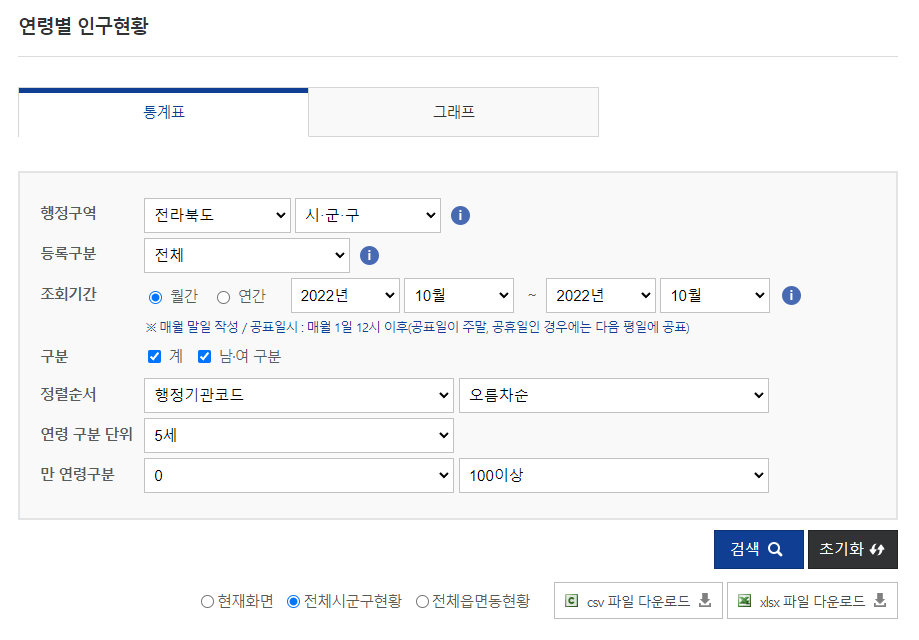

In [20]:
import pandas as pd
# 데이터 불러오기
df = pd.read_csv("202210_202210_연령별인구현황_월간.csv", encoding='cp949', thousands = ',')
df.head()

,행정구역,2022년10월_계_총인구수,2022년10월_계_연령구간인구수,2022년10월_계_0~4세,2022년10월_계_5~9세,2022년10월_계_10~14세,2022년10월_계_15~19세,2022년10월_계_20~24세,2022년10월_계_25~29세,2022년10월_계_30~34세,...,2022년10월_여_55~59세,2022년10월_여_60~64세,2022년10월_여_65~69세,2022년10월_여_70~74세,2022년10월_여_75~79세,2022년10월_여_80~84세,2022년10월_여_85~89세,2022년10월_여_90~94세,2022년10월_여_95~99세,2022년10월_여_100세 이상
0,서울특별시 (1100000000),9443722,9443722,230113,321436,363830,387057,586313,813585,753243,...,352536,374791,306812,220053,168528,125384,65015,25029,6074,1020
1,서울특별시 종로구 (1111000000),141861,141861,2548,3967,4779,5370,9727,12790,10530,...,5754,5562,4473,3330,2967,2497,1300,494,119,20
2,서울특별시 중구 (1114000000),120648,120648,2796,3194,2978,3392,7083,10659,10706,...,4579,4891,4091,2996,2590,2128,1207,482,116,20
3,서울특별시 용산구 (1117000000),219102,219102,5536,6568,6755,7576,12698,19363,20431,...,8248,8267,6580,4709,3995,3470,1959,770,173,35
4,서울특별시 성동구 (1120000000),281694,281694,8717,9640,8747,9871,18089,24418,23196,...,10673,10891,8563,6042,5084,3919,2034,690,159,29


In [35]:
import pandas as pd
# 데이터 불러오기
df = pd.read_csv("전주시_구·동별_세대_및_인구_현황_20231006105348.csv", encoding='cp949', thousands = ',')
df.head()

,구동별(1),구동별(2),2022,2022.1,2022.2,2022.3,2022.4,2022.5,2022.6,2022.7,2022.8,2022.9,2022.10
0,구동별(1),구동별(2),합계,합계,합계,합계,한국인,한국인,한국인,한국인,외국인,외국인,외국인
1,구동별(1),구동별(2),세대수 (세대),총인구 (명),남자인구 (명),여자인구 (명),세대수 (세대),총인구 (명),남자인구 (명),여자인구 (명),총인구 (명),남자인구 (명),여자인구 (명)
2,전주시,소계,296241,661259,325025,336234,296241,651495,320265,331230,9764,4760,5004
3,완산구,소계,153551,337117,164029,173088,153551,332573,161835,170738,4544,2194,2350
4,완산구,중앙동,4949,10211,5127,5084,4949,9690,4846,4844,521,281,240


In [36]:
df.columns

Index(['구동별(1)', '구동별(2)', '2022', '2022.1', '2022.2', '2022.3', '2022.4',
       '2022.5', '2022.6', '2022.7', '2022.8', '2022.9', '2022.10'],
      dtype='object')

In [37]:
# 65세 이상 인구 비율 구하기
df.loc[:, '2022년10월_계_총인구수':'2022년10월_계_100세 이상'].astype(int)
df['계_65세이상']=df['2022년10월_계_65~69세']+df['2022년10월_계_70~74세']+df['2022년10월_계_75~79세']+df['2022년10월_계_80~84세']+df['2022년10월_계_85~89세']+df['2022년10월_계_90~94세']+df['2022년10월_계_95~99세']+df['2022년10월_계_100세 이상']
# print(df['계_65세이상'])
df

KeyError: '2022년10월_계_총인구수'

In [24]:
df = df.fillna(0)
df.isnull().sum()

구동별(1)     0
구동별(2)     0
2022       0
2022.1     0
2022.2     0
2022.3     0
2022.4     0
2022.5     0
2022.6     0
2022.7     0
2022.8     0
2022.9     0
2022.10    0
dtype: int64

In [25]:
df['유아']=df['2022년10월_계_0~4세']+df['2022년10월_계_5~9세']
df['10대']=df['2022년10월_계_10~14세']+df['2022년10월_계_15~19세']
df['20대']=df['2022년10월_계_20~24세']+df['2022년10월_계_25~29세']
df['30대']=df['2022년10월_계_30~34세']+df['2022년10월_계_35~39세']
df['40대']=df['2022년10월_계_40~44세']+df['2022년10월_계_45~49세']
df['50~65세']=df['2022년10월_계_50~54세']+df['2022년10월_계_55~59세']+df['2022년10월_계_60~64세']
df.head()

KeyError: '2022년10월_계_0~4세'

In [26]:
df['65세이상_비율(%)']=round(df['계_65세이상']/df['2022년10월_계_총인구수']*100,1)
# df=df.drop(['65세이상_비율'], axis=1)
df['유아_비율(%)']=round(df['유아']/df['2022년10월_계_총인구수']*100,1)
df['10대_비율(%)']=round(df['10대']/df['2022년10월_계_총인구수']*100,1)
df['20대_비율(%)']=round(df['20대']/df['2022년10월_계_총인구수']*100,1)
df['30대_비율(%)']=round(df['30대']/df['2022년10월_계_총인구수']*100,1)
df['40대_비율(%)']=round(df['40대']/df['2022년10월_계_총인구수']*100,1)
df['50~65세_비율(%)']=round(df['50~65세']/df['2022년10월_계_총인구수']*100,1)

df

KeyError: '계_65세이상'

In [34]:
df['행정구역']=df['행정구역'].str.split('(').str[0]
# df.head()
# if '전라북도' in df['행정구역']:
#     df1 = df[:, '행정구역']
#     print(df1.head())

dfjb=df[df['행정구역'].str.contains('전라북도')]
# dfjb['행정구역']

KeyError: '행정구역'

In [28]:
# 비율에 따라 지도 그리기
!sudo apt-get install -y fonts-nanum

Password:
sudo: a password is required


In [29]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [30]:
import matplotlib as mpl
import geopandas as gpd
import matplotlib.pyplot as plt

gpd.__version__

'0.14.0'

In [31]:
jb = gpd.read_file("TL_KODIS_BAS_JB.zip", encoding='euckr')

jb['KOR_NM']=jb['CTP_KOR_NM']+str(" ")+jb['SIG_KOR_NM']+str(" ")
jb

,BAS_AR,BAS_ID,BAS_MGT_SN,CTP_KOR_NM,MVMN_DE,MVMN_RESN,NTFC_DE,OPERT_DE,SIG_CD,SIG_KOR_NM,geometry,KOR_NM
0,2.853812,54803,4511000191,전라북도,20121221,국가기초구역 최초생성,20121221,20121221000000,45110,전주시,"POLYGON ((958934.777 1763357.239, 958941.598 1...",전라북도 전주시
1,0.150989,55019,4511000022,전라북도,20121221,국가기초구역 최초생성,20121221,20121221000000,45110,전주시,"POLYGON ((969600.080 1759445.882, 969583.928 1...",전라북도 전주시
2,0.183129,55023,4511000023,전라북도,20121221,국가기초구역 최초생성,20121221,20121221000000,45110,전주시,"POLYGON ((970713.182 1759260.656, 970678.087 1...",전라북도 전주시
3,0.116598,55022,4511000024,전라북도,20121221,국가기초구역 최초생성,20121221,20121221000000,45110,전주시,"POLYGON ((970577.760 1759626.321, 970578.494 1...",전라북도 전주시
4,0.180809,55048,4511000069,전라북도,20121221,국가기초구역 최초생성,20121221,20121221000000,45110,전주시,"POLYGON ((966758.029 1757214.422, 966761.021 1...",전라북도 전주시
...,...,...,...,...,...,...,...,...,...,...,...,...
1553,1.004601,56326,4580000015,전라북도,NaN,NaN,20121221,NaN,45800,부안군,"POLYGON ((925704.279 1733425.513, 925715.523 1...",전라북도 부안군
1554,2.763326,56346,4580000011,전라북도,NaN,NaN,20121221,NaN,45800,부안군,"POLYGON ((920655.636 1733967.747, 920665.734 1...",전라북도 부안군
1555,5.010485,56301,4580000043,전라북도,NaN,NaN,20121221,NaN,45800,부안군,"POLYGON ((927785.037 1752450.716, 927820.582 1...",전라북도 부안군
1556,0.595634,56310,4580000036,전라북도,NaN,NaN,20121221,NaN,45800,부안군,"POLYGON ((930472.516 1748476.945, 930457.495 1...",전라북도 부안군


In [32]:
set(dfjb['행정구역'].unique()) - set(jb['KOR_NM'].unique())
jb1 = pd.merge(jb, dfjb, how='right', left_on='KOR_NM', right_on='행정구역')
# jb1= jb1.drop([0], axis=0)
# jb1.isnull().sum()
jb1

NameError: name 'dfjb' is not defined

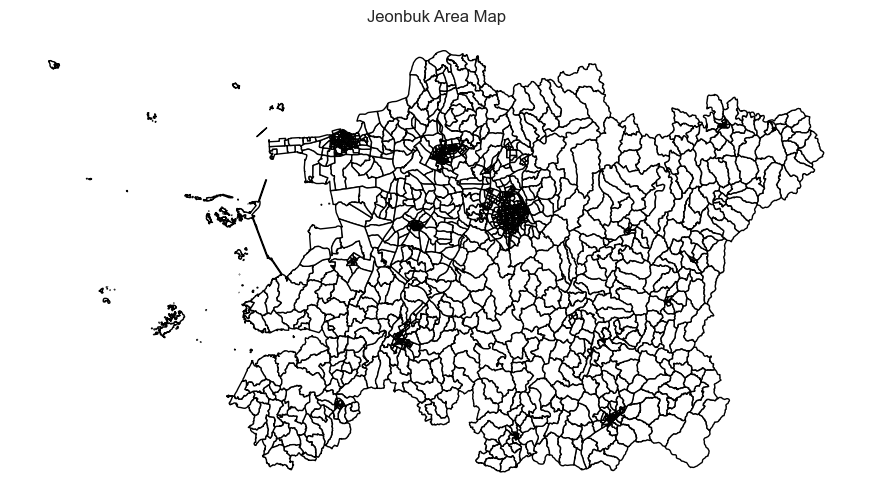

In [38]:
ax = jb.plot(figsize=(11, 11), color="w", edgecolor="k")
ax.set_title("Jeonbuk Area Map")
ax.set_axis_off()
plt.show()


In [ ]:
# print(jb1)
jb1.geometry = jb1.buffer(0.1)
jb1= jb1.dissolve(by='SIG_CD')
jb1
ax = jb1.plot(figsize=(15, 15), column="65세이상_비율(%)", categorical=True,
                cmap="tab20b", edgecolor="k", legend=True, legend_kwds={'loc': 3})

ax.set_title("MAP")
ax.set_axis_off()
plt.show()

## 읍면동 자료 받기

 - 위 그림에서 "전체읍면동현황" 선택 후, 데이터 분석

In [ ]:
# 읍면동별 자료 받기
df1= pd.read_csv('202210_202210_연령별인구현황_월간 (1).csv', encoding='cp949', thousands = ',')
df1.head()

In [ ]:
# 65세 이상 인구비율 구하기
df1['행정구역']=df1['행정구역'].str.split('(').str[0]

df1=df1[df1['행정구역'].str.contains('전라북도')]
df1

In [ ]:
df1.loc[:, '2022년10월_계_총인구수':'2022년10월_계_100세 이상'].astype(int)
df1['계_65세이상']=df1['2022년10월_계_65~69세']+df1['2022년10월_계_70~74세']+df1['2022년10월_계_75~79세']+df1['2022년10월_계_80~84세']+df1['2022년10월_계_85~89세']+df1['2022년10월_계_90~94세']+df1['2022년10월_계_95~99세']+df1['2022년10월_계_100세 이상']
df1['65세이상_비율(%)']=round(df1['계_65세이상']/df1['2022년10월_계_총인구수']*100, 1)
df1

In [ ]:
# 전라북도에서 초고령사회로 진입한 읍면동 구하기
df1["사회분류"] = df1['65세이상_비율(%)'].apply(lambda x: "초고령사회" if x>20 else ("고령사회" if x>14 else("고령화사회" if x>= 7 else "일반") ))
# df1

# df1[df1["사회분류"] == "초고령사회"]["행정구역"].values
print(df1[df1["사회분류"] == "초고령사회"]["행정구역"].values)

In [ ]:
# 전라북도 읍면동 중, 고령화사회, 고령사회, 초고령사회에 해당하는 읍면동의 총 갯수를 구하기
df1["사회분류"].value_counts()

In [ ]:
# 65세 이상 인구비율이 가장 높은 지역 5개를 출력하기
df1.sort_values(by='65세이상_비율(%)', ascending=False).head(5)

In [ ]:
# 65세 이상 인구비율이 가장 낮은 지역 5개를 출력하기
df1.sort_values(by='65세이상_비율(%)', ascending=True).head(5)